In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = '/Users/susanakohlhaas/Documents/SQL Project Ironhack/udemy_courses-cleaned - udemy_courses-cleaned.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of             published_timestamp  course_id  \
0     2017-01-18 20:58:58+00:00    1070968   
1     2017-03-09 16:34:20+00:00    1113822   
2     2016-12-19 19:26:30+00:00    1006314   
3     2017-05-30 20:07:24+00:00    1210588   
4     2016-12-13 14:57:18+00:00    1011058   
...                         ...        ...   
3667  2016-06-14 17:36:46+00:00     775618   
3668  2017-03-10 22:24:30+00:00    1088178   
3669  2015-12-30 16:41:42+00:00     635248   
3670  2016-08-11 19:06:15+00:00     905096   
3671  2014-09-28 19:51:11+00:00     297602   

                                           course_title  \
0                    Ultimate Investment Banking Course   
1     Complete GST Course & Certification - Grow You...   
2     Financial Modeling for Business Analysts and C...   
3     Beginner to Pro - Financial Analysis in Excel ...   
4          How To Maximize Your Profits Trading Options   
...                                                 ...   
3667

In [12]:
## Mandatory Lambda (create new column "profit" which is calculated with price times number of susbcribers
df['profit'] = df.apply(lambda row: row['price'] * row['num_subscribers'], axis=1)
df.head()

,published_timestamp,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year,month,profit,duration_category,price_category
0,2017-01-18 20:58:58+00:00,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017,January,429400,1:3,158:20:00
1,2017-03-09 16:34:20+00:00,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017,March,209400,20+,56:40:00
2,2016-12-19 19:26:30+00:00,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016,December,97830,07:12,20:50
3,2017-05-30 20:07:24+00:00,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017,May,232845,07:12,56:40:00
4,2016-12-13 14:57:18+00:00,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016,December,255200,3:7,158:20:00


In [14]:
## Mandatory Groupby: Check the total profit by the subject
profit_by_subject = df.groupby('subject')['profit'].sum().reset_index()
print(profit_by_subject)

               subject     profit
0     Business Finance  123735315
1       Graphic Design   76983170
2  Musical Instruments   53359055
3      Web Development  627597400


In [16]:
## Group The course average duration by level
avg_duration_by_level = df.groupby('level')['content_duration'].mean().reset_index()
print(avg_duration_by_level)

                level  content_duration
0          All Levels          4.874000
1      Beginner Level          3.094401
2        Expert Level          2.905460
3  Intermediate Level          3.733333


In [18]:
## Frequency of the courses by subject
frequency_table = df['subject'].value_counts()
print(frequency_table)

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64


In [22]:
## What is the total revenue generated by all paid courses?
total_revenue = df[df['is_paid'] == 1].apply(lambda row: row['price'] * row['num_subscribers'], axis=1).sum()
print(total_revenue)

881674940


In [24]:
## Which courses are the most profitable (based on price and subscribers)?
df['profit'] = df['price'] * df['num_subscribers']
most_profitable_courses = df[['course_title', 'profit']].sort_values(by='profit', ascending=False).head(10)
print(most_profitable_courses)

                                           course_title    profit
3224                         The Web Developer Bootcamp  24316800
3226              The Complete Web Developer Course 2.0  22902400
1974  Pianoforall - Incredible New Way To Learn Pian...  15099800
3198  Angular 4 (formerly Angular 2) - The Complete ...  14018770
3241          JavaScript: Understanding the Weird Parts  13932100
3245                        Learn and Understand NodeJS  11350560
2656  The Complete HTML & CSS Course - From Novice T...  11197290
3169  Complete PHP Course With Bootstrap3 CMS System...  10789740
3240                     Learn and Understand AngularJS  10388175
3248                            Modern React with Redux   9146700


In [28]:
## What is the average revenue per course for each subject
df['profit'] = df['price'] * df['num_subscribers']
average_revenue_per_subject = df.groupby('subject')['profit'].mean().reset_index()
print(average_revenue_per_subject)

               subject         profit
0     Business Finance  103891.952141
1       Graphic Design  127879.019934
2  Musical Instruments   78469.198529
3      Web Development  523434.028357


In [30]:
##  What is the total revenue generated by courses published in each year?
df['year'] = pd.to_numeric(df['year'], errors='coerce')
total_revenue_per_year = df.groupby('year').apply(lambda x: (x['price'] * x['num_subscribers']).sum()).reset_index(name='total_revenue')
print(total_revenue_per_year)

   year  total_revenue
0  2011       11643420
1  2012       11773470
2  2013       69405820
3  2014      106939045
4  2015      314510395
5  2016      276633190
6  2017       90769600


In [32]:
## Which subject generates the highest revenue?
df['profit'] = df['price'] * df['num_subscribers']
total_revenue_per_subject = df.groupby('subject')['profit'].sum().reset_index()
highest_revenue_subject = total_revenue_per_subject.loc[total_revenue_per_subject['profit'].idxmax()]
print(highest_revenue_subject)

subject    Web Development
profit           627597400
Name: 3, dtype: object


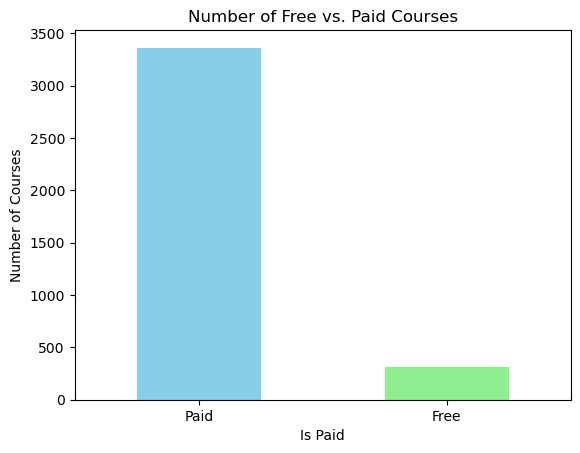

In [38]:
## Free vs Paid
df['is_paid'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Free vs. Paid Courses')
plt.xlabel('Is Paid')
plt.ylabel('Number of Courses')
plt.xticks(ticks=[0, 1], labels=['Paid', 'Free'], rotation=0)
plt.show()


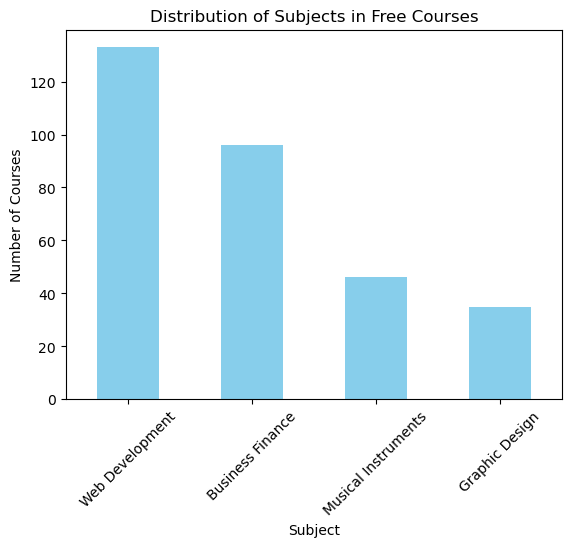

In [46]:
## Where are most of the paid tracksdf['is_paid'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
# Filter for free courses
free_courses = df[df['is_paid'] == False]
free_courses['subject'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Subjects in Free Courses')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Graphs

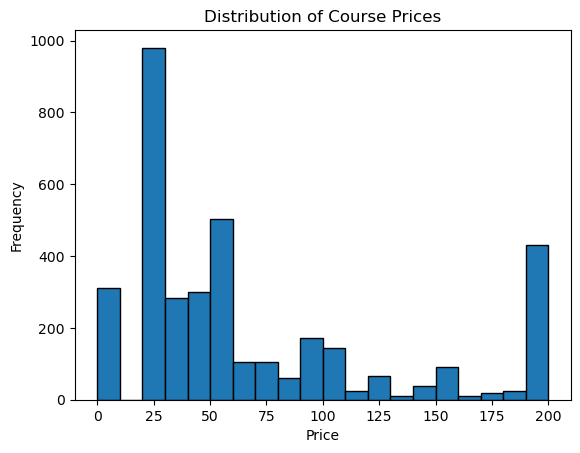

In [27]:
## Distribution of Course Prices
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


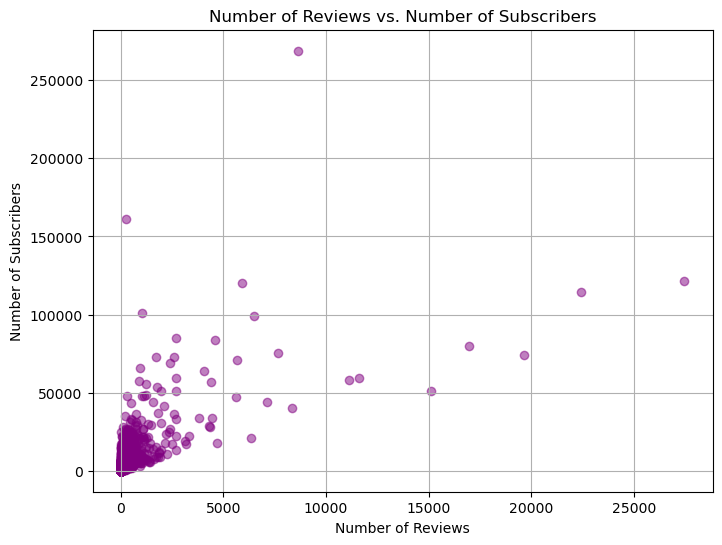

In [33]:
## Reviews vs Subscribers
plt.figure(figsize=(8, 6))
plt.scatter(df['num_reviews'], df['num_subscribers'], alpha=0.5, color='purple')
plt.title('Number of Reviews vs. Number of Subscribers')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.show()

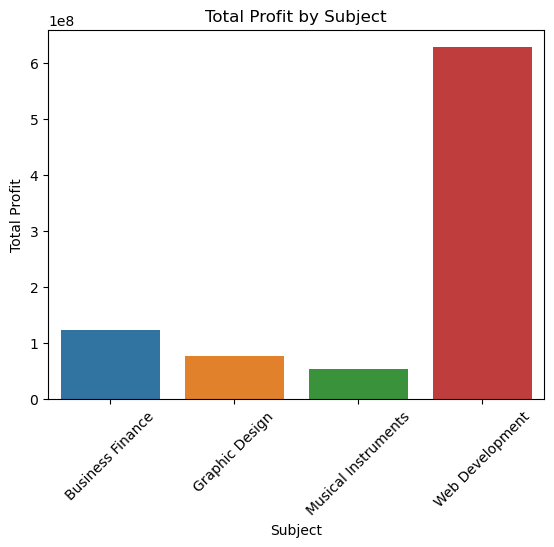

In [31]:
## Total profit per subject
sns.barplot(x='subject', y='profit', data=profit_by_subject)
plt.title('Total Profit by Subject')
plt.xlabel('Subject')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

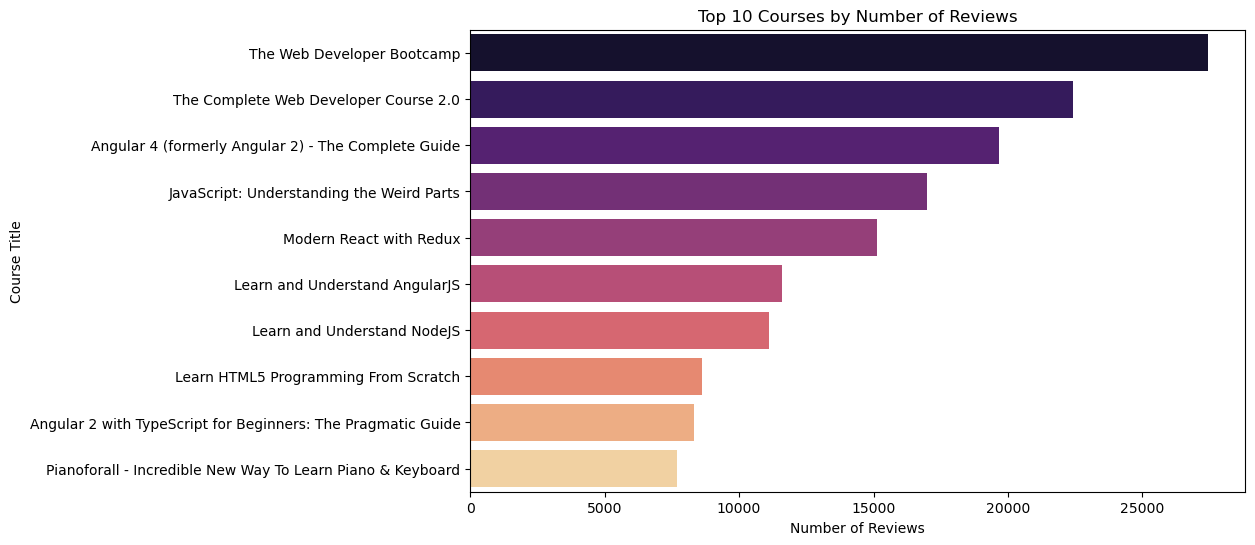

In [37]:
## Top 10 Courses by Number of Reviews
top_courses_reviews = df.nlargest(10, 'num_reviews')[['course_title', 'num_reviews']]

plt.figure(figsize=(10, 6))
sns.barplot(x='num_reviews', y='course_title', data=top_courses_reviews, palette='magma')
plt.title('Top 10 Courses by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Course Title')
plt.show()

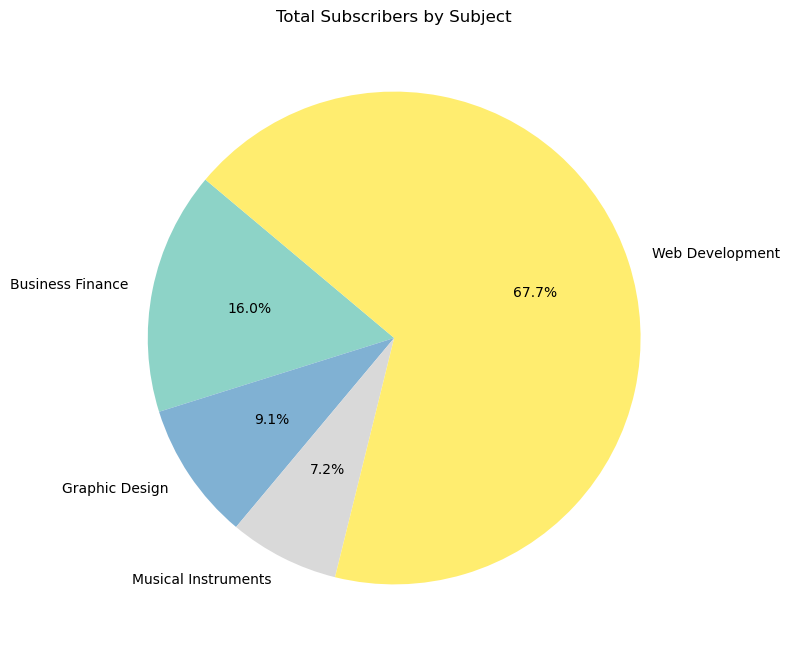

In [39]:
## Total Subscribers by Subject
total_subscribers_per_subject = df.groupby('subject')['num_subscribers'].sum()

plt.figure(figsize=(8, 8))
total_subscribers_per_subject.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Total Subscribers by Subject')
plt.ylabel('')  # Hides the default ylabel
plt.show()
